In [2]:
#import main libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

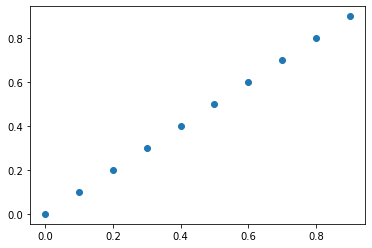

In [3]:
#Making a set of data and time
y = np.arange(0,1,0.1)
t = np.arange(0,1,0.1)

plt.plot(t,y, 'o')

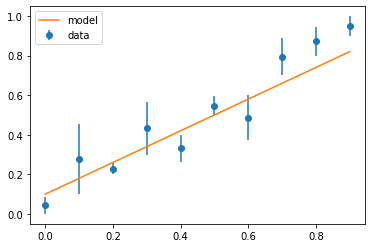

In [6]:
#Adding withe noise to the set of data
noise = np.random.normal( 0, 0.1, y.shape)
signal = y + noise

#Creating a line function
def line(a,b,t):
    f = a + b*t
    return f

a = 0.1
b = 0.8
f = line(a,b,t)

plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t, f, label = "model")
plt.legend()
plt.show()

# Gaussian Likelihood


$ L = P(D|M) = \left[ \prod_{i = 1}^{n} \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right]exp\left[ \sum_{i =1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right] $

## Taking the natural log to the Gaussian Likelihood:


$ \ln(L) = \sum_{i = 1}^{n}  \ln \left[ \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right] + \sum_{i = 1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} $

$ log(L) = \sum_{i=1}^{n} \left[ \ln \left( \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right) + \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

In [7]:
#Defining a function for the logarithmic Gaussian likelihood
def lolik(signal, f):
    for i in range(0,len(t)):
        f[i] = a + b*t[i]
        loli = np.log(1/np.sqrt(2*np.pi*noise[i]**2)) + ((signal[i] - f[i])**2)/(2*(noise[i]**2))
    return loli

loli = lolik(signal,f)
lik_model = minimize(lolik(signal,f), np.array([1,1]) , method='L-BFGS-B')

TypeError: 'numpy.float64' object is not callable